**Multiple Linear Regression Example** -https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In this example will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('petrol_consumption.csv')

In [4]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
#Statistical details of data set
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
#Divide the data into attributes and labels (X=attribute, y= label)
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [7]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
#Coefficients of regression model
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

In [10]:
#Making predictions
y_pred = regressor.predict(X_test)

In [11]:
#Compare the actual output values for X-test wit the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [12]:
#Evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


In [14]:
#Evaluating the Root Mean Squared Error
#A good algorithm produces a RMSE < 10% of the mean of the output data
average=dataset['Petrol_Consumption'].mean()
average*0.1

57.67708333333334

The value of RMSE is 68.3, which is slightly greater than 10% of the mean value of the gas consumption in all states, 57.7. 
This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

1. Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
2. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

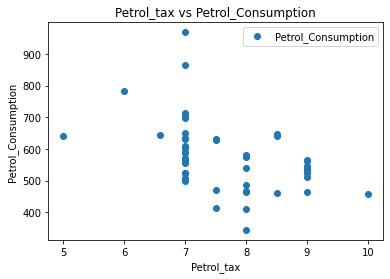

In [15]:
#Plotting dataset on 2-D graph
dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')
plt.show()

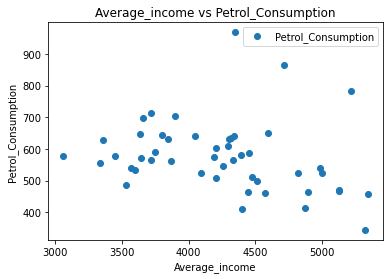

In [16]:
#Plotting dataset on 2-D graph
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average_income vs Petrol_Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')
plt.show()

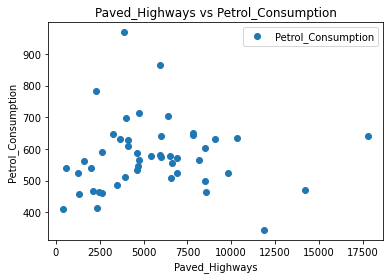

In [17]:
#Plotting dataset on 2-D graph
dataset.plot(x='Paved_Highways', y='Petrol_Consumption', style='o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()

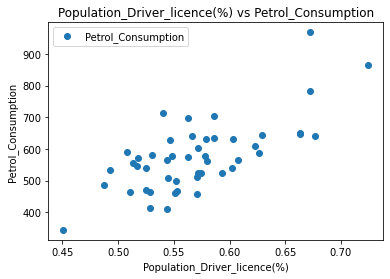

In [18]:
#Plotting dataset on 2-D graph
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Population_Driver_licence(%) vs Petrol_Consumption')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Petrol_Consumption')
plt.show()


In [19]:
#Is there a correlation between the data?
dataset.corr().round(decimals=2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.00,0.01,-0.52,-0.29,-0.45
Average_income,0.01,1.00,0.05,0.16,-0.24
Paved_Highways,-0.52,0.05,1.00,-0.06,0.02
Population_Driver_licence(%),-0.29,0.16,-0.06,1.00,0.70
Petrol_Consumption,-0.45,-0.24,0.02,0.70,1.00
